In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sequence = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"

#sequence = "D:/Data/both 800fps/brightfield/*tif"
#reference_sequence = "D:/Data/both 800fps/ref_seq.tif"
#reference_sequence_period = "D:/Data/both 800fps/ref_seq.txt"

og = BOG()
og.settings["matching_method"] = "SSD"
og.logger.set_normal()
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
og.run()

BOG i Loading sequence...
BOG ✓ Sequence loaded with 1107 frames
BOG i Loading reference sequence...
BOG ✓ Reference sequence loaded with 40 frames
BOG i Setting reference period to 35.77851226661945
BOG i Calculating SADs...
BOG ✓ SADs calculated
BOG i Calculating phases...
BOG ✓ Phases calculated
BOG i Calculating delta phases...
BOG ✓ Delta phases calculated
BOG i Unwrapping phases...
BOG ✓ Unwrapped phases calculated
BOG ✓ Finished processing sequence.


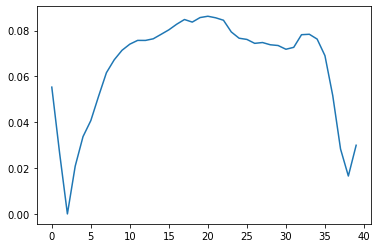

In [4]:
plt.plot(og.sads[10])

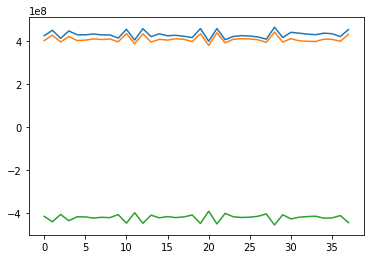

In [5]:
bc_I_1_squared = []
bc_I_2_squared = []
bc_I_1_times_I_2 = []


# Get intensity function parameters from reference sequence
for i in range(1, og.reference_sequence.shape[0] - 1):
    y_1 = og.reference_sequence[i - 1].astype(np.int32)
    y_2 = og.reference_sequence[i].astype(np.int32)
    y_3 = og.reference_sequence[i + 1].astype(np.int32)

    I_0 = y_2
    I_2 = (y_1 + y_3 - 2 * y_2) / 2
    I_1 = y_3 - I_2 - I_0

    I_1_squared = np.sum(I_1**2)
    I_2_squared = np.sum(I_2**2)
    I_1_times_I_2 = np.sum(I_1 * I_2)

    bc_I_1_squared.append(I_1_squared)
    bc_I_2_squared.append(I_2_squared)
    bc_I_1_times_I_2.append(I_1_times_I_2)

plt.plot(bc_I_1_squared)
plt.plot(bc_I_2_squared)
plt.plot(bc_I_1_times_I_2)

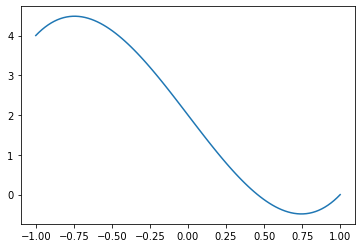

In [6]:

def fitting_function(t, t_n, I_1_squared, I_2_squared, I_1_times_I_2):
    return (t - t_n)**2 + (t**2 - t_n**2) * I_2_squared + (t - t_n) * (t**2 - t_n**2) * I_1_times_I_2

xs = np.linspace(-1, 1, 100)
ys = fitting_function(xs, 1, 1, 2, 3)

plt.plot(xs, ys)
plt.show()

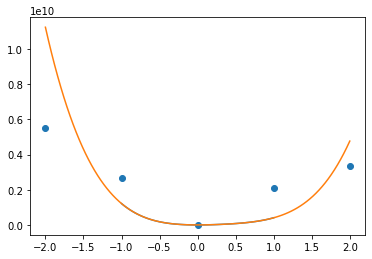

In [9]:
def I_1_squared(t_n, begin, middle, end):
    if t_n < 0:
        return begin * abs(t_n) + middle * (1 - abs(t_n))
    else:
        return middle * (1 - t_n) + end * t_n
    
def I_2_squared(t_n, begin, middle, end):
    if t_n < 0:
        return begin * abs(t_n) + middle * (1 - abs(t_n))
    else:
        return middle * (1 - t_n) + end * t_n
    
def I_1_times_I_2(t_n, begin, middle, end):
    if t_n < 0:
        return begin * abs(t_n) + middle * (1 - abs(t_n))
    else:
        return middle * (1 - t_n) + end * t_n

frame = 10
minima = np.argmin(og.sads[frame][2:-2]) + 2

def fitting_function(t, t_n):
    return (t - t_n)**2 * I_1_squared(t_n, bc_I_1_squared[minima - 1], bc_I_1_squared[minima], bc_I_1_squared[minima + 1]) + (t**2 - t_n**2)**2 * I_2_squared(t_n, bc_I_2_squared[minima - 1], bc_I_2_squared[minima], bc_I_2_squared[minima + 1]) + (t - t_n) * (t**2 - t_n**2) * I_1_times_I_2(t_n, bc_I_1_times_I_2[minima - 1], bc_I_1_times_I_2[minima], bc_I_1_times_I_2[minima + 1])

xs = np.linspace(-1, 1, 100)
ys = fitting_function(xs, -0)

plt.plot(xs, ys)
#plt.show()


def I_1_squared(t_n, begin, middle, end):
    if t_n < 0:
        return begin * abs(t_n) + middle * (1 - abs(t_n))
    else:
        return middle * (1 - t_n) + end * t_n
    
def I_2_squared(t_n, begin, middle, end):
    if t_n < 0:
        return begin * abs(t_n) + middle * (1 - abs(t_n))
    else:
        return middle * (1 - t_n) + end * t_n
    
def I_1_times_I_2(t_n, begin, middle, end):
    if t_n < 0:
        return begin * abs(t_n) + middle * (1 - abs(t_n))
    else:
        return middle * (1 - t_n) + end * t_n

def fitting_function(t, t_n):
    return (t - t_n)**2 * I_1_squared(t_n, bc_I_1_squared[minima], bc_I_1_squared[minima], bc_I_1_squared[minima]) + (t**2 - t_n**2)**2 * I_2_squared(t_n, bc_I_2_squared[minima], bc_I_2_squared[minima], bc_I_2_squared[minima]) + (t - t_n) * (t**2 - t_n**2) * I_1_times_I_2(t_n, bc_I_1_times_I_2[minima], bc_I_1_times_I_2[minima], bc_I_1_times_I_2[minima])

xs = np.linspace(-2, 2, 100)
ys = fitting_function(xs, -0)

plt.plot(xs, ys)

plt.scatter(np.linspace(-2, 2, 5), og.sads[frame][minima - 2:minima + 3] * 1e11)
plt.show()